In [2]:
using Plots


In [3]:
function draw_NACA_4_digit(naca_id::String)
    m = parse(Int64, naca_id[1]) / 100
    p = parse(Int64, naca_id[2]) / 10
    upper_lower = parse(Int64, naca_id[3:4]) / 100

    camber_x, camber_y = NACA_4_digit_camber(m, p)
    upper, lower = NACA_4_digit_upper_lower(m, p, upper_lower, camber_y)
    x_chord, y_chord = NACA_4_digit_chord(camber_y)

    plt = plot(camber_x, camber_y, ylim=[-0.2, 0.2], size=(700, 300), label="Camber", linewidth=2)
    plot!(upper[1], upper[2], label="Upper Surface", linewidth=2)
    plot!(lower[1], lower[2], label="Lower Surface", linewidth=2)
    plot!(x_chord, y_chord, label="Chord", color=:black, linewidth=2)

    plt
end

draw_NACA_4_digit (generic function with 1 method)

In [4]:
function NACA_4_digit_camber(m::Union{Float64, Int64}, p::Union{Float64, Int64})
    if p != 0
        x_1 = LinRange(0, p, floor(Int64, 2000 * p))
        x_2 = LinRange(p, 1., 2000 - size(x_1)[1])
        a = m / p^2 .* (2 * p .* x_1 - x_1.^2)
        b = m / (1 - p)^2 .* ((1 - 2 * p) .+ 2 * p .* x_2 - x_2.^2)
        return [x_1; x_2], [a; b]
    else
        return LinRange(0, 1, 2000), [0. for i in 1:2000]
    end
end

NACA_4_digit_camber (generic function with 1 method)

In [5]:
function NACA_4_digit_upper_lower(m::Union{Float64, Int64}, p::Union{Float64, Int64}, upper_lower::Union{Float64, Int64}, y_c::Vector{Float64})
    x = LinRange(0, 1, 2000)
    y_t = 5 .* upper_lower .* (0.2969 .* sqrt.(x) .- 0.1260 .* x .- 0.3516 .* x.^2 .+ 0.2843 .* x.^3 .- 0.1015 .* x.^4)
    if p != 0
        x_1 = LinRange(0, p, floor(Int64, 2000 * p))
        x_2 = LinRange(p, 1., 2000 - size(x_1)[1])
        a = 2 .* m / p^2 .* (p .- x_1)
        b = 2 .* m / (1 - p)^2 .* (p .- x_2)
        θ = atan.([a; b])

        x_u = x .- y_t .* sin.(θ)
        x_l = x .+ y_t .* sin.(θ)
        y_u = y_c .+ y_t .* cos.(θ)
        y_l = y_c .- y_t .* cos.(θ)
    else
        x_u = x
        x_l = x
        y_u = y_t
        y_l = .-y_t
    end

    (x_u, y_u), (x_l, y_l)
end

NACA_4_digit_upper_lower (generic function with 1 method)

In [6]:
function NACA_4_digit_chord(y_c::Vector{Float64})
    y_0 = y_c[1]
    y_1 = y_c[end]
    x_0 = 0.
    x_1 = 1.
    slope = y_1 - y_0
    x = LinRange(0, 1, 2000)

    y_chord = slope .* x .+ y_0

    (x, y_chord)
end
    


NACA_4_digit_chord (generic function with 1 method)

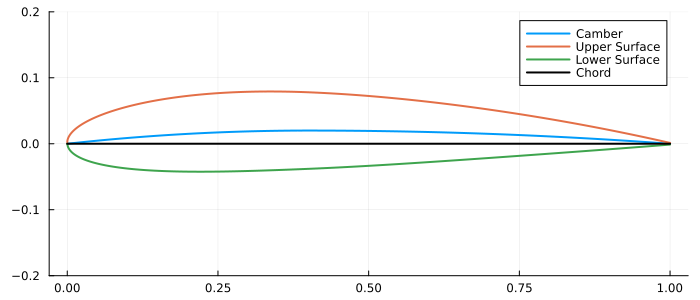

In [9]:
draw_NACA_4_digit("2412")